In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/project /telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1986,7710-JSYOA,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),93.30,6398.05,No
2666,8414-OOEEL,Male,0,No,Yes,66,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.50,5196.1,No
3059,7503-EPSZW,Female,0,Yes,Yes,64,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.05,1559.15,No
1876,3946-JEWRQ,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.20,4563,No
2049,1170-SASML,Female,0,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.40,5869.4,No


In [5]:
df.drop('customerID', axis = 1, inplace =True)

In [6]:
df['TotalCharges'].replace(' ',np.nan, inplace = True)

In [7]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df['TotalCharges'].isnull().sum()*100/df.shape[0]

0.15618344455487718

In [9]:
m = df['TotalCharges'].mean()
m

2283.3004408418697

In [10]:
df['TotalCharges'].fillna(m, inplace = True)

In [11]:
# check if data is imbalanced or not
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int','float'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_cat:
  df_cat[col] = le.fit_transform(df_cat[col])

In [15]:
df_new = pd.concat([df_num, df_cat], axis = 1)

In [16]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [17]:
X = df_new.drop('Churn', axis = 1)
Y = df_new['Churn']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 1)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [22]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 1)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)
X_test_ros, Y_test_ros = ros.fit_resample(X_test, Y_test)

In [23]:
pd.Series(Y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [24]:
import tensorflow as tf
from keras import regularizers

In [25]:
from keras.layers import Dropout
model = tf.keras.Sequential([
        tf.keras.layers.Dense(units = 64, activation = 'relu', 
                               input_shape = (X.shape[1],)),
#hidden layer1
tf.keras.layers.Dense(units = 64, activation = 'relu'),
tf.keras.layers.Dense(units= 1, activation = 'sigmoid')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =  ['accuracy']) # for loss and score use metrics


In [28]:
trained_model = model.fit(X_train_ros, Y_train_ros, epochs = 100, batch_size = 32,
                          validation_data = (X_test_ros, Y_test_ros))

Epoch 1/100
225/225 [==============================] - 3s 6ms/step - loss: 0.5235 - accuracy: 0.7413 - val_loss: 0.4764 - val_accuracy: 0.7741
Epoch 2/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4811 - accuracy: 0.7678 - val_loss: 0.4759 - val_accuracy: 0.7685
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.7714 - val_loss: 0.4784 - val_accuracy: 0.7700
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7788 - val_loss: 0.4754 - val_accuracy: 0.7669
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4530 - accuracy: 0.7842 - val_loss: 0.4822 - val_accuracy: 0.7710
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7871 - val_loss: 0.4830 - val_accuracy: 0.7716
Epoch 7/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.7948 - val_loss: 0.4894 - val_accuracy: 0.7669

In [29]:
# show loss and accuracy on testing data, use evaluate method
print('Test accuracy')
model.evaluate(X_test, Y_test)
# show loss and accuracy on training data, use evaluate method
print("train accuracy|")
model.evaluate(X_train, Y_train)

Test accuracy
67/67 [==============================] - 0s 2ms/step - loss: 1.0665 - accuracy: 0.7416
train accuracy|
155/155 [==============================] - 1s 4ms/step - loss: 0.1464 - accuracy: 0.9347


[0.14640231430530548, 0.9346855878829956]

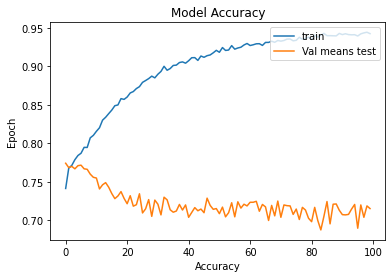

In [30]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(["train","Val means test"],loc='upper right')
plt.show()

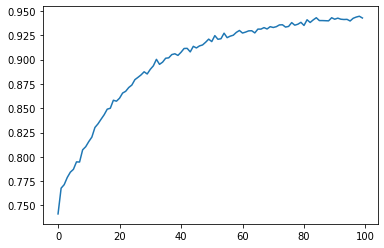

In [31]:
plt.plot(trained_model.history['accuracy'])
plt.show()

In [32]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred>=0.5,1,0)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1585
           1       0.49      0.66      0.56       528

    accuracy                           0.74      2113
   macro avg       0.68      0.71      0.69      2113
weighted avg       0.77      0.74      0.75      2113

[[1221  364]
 [ 182  346]]


In [33]:
print('Train score')
model.evaluate(X_train_ros, Y_train_ros)

Train score
225/225 [==============================] - 1s 2ms/step - loss: 0.1242 - accuracy: 0.9512


[0.12423132359981537, 0.9512398838996887]

In [34]:
print("Test score")
model.evaluate(X_test_ros, Y_test_ros)

Test score
100/100 [==============================] - 0s 2ms/step - loss: 1.3232 - accuracy: 0.7151


[1.3231602907180786, 0.7151419520378113]

In [36]:
from keras.layers import Dropout

In [47]:
from keras  import regularizers
model1=tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 64, activation = 'relu',
                                kernel_regularizer=regularizers.l2(0.01), 
                               input_shape = (X.shape[1],)),
                              #50% neuron deactivate
#hidden layer1
                              tf.keras.layers.Dense(units = 64, activation = 'relu',
                              kernel_regularizer=regularizers.l2(0.01)),
                              tf.keras.layers.Dense(units= 1000, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),Dropout(0.5),
tf.keras.layers.Dense(units= 1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.01))
                            
])

In [48]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1280      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1000)              65000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 71,441
Trainable params: 71,441
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =  ['accuracy']) # for loss and score use metrics


In [51]:
trained_model1 = model1.fit(X_train_ros, Y_train_ros, epochs = 100, batch_size = 32,
                          validation_data = (X_test_ros, Y_test_ros))

Epoch 1/100
225/225 [==============================] - 5s 10ms/step - loss: 1.1845 - accuracy: 0.7400 - val_loss: 0.7031 - val_accuracy: 0.7732
Epoch 2/100
225/225 [==============================] - 2s 8ms/step - loss: 0.6500 - accuracy: 0.7565 - val_loss: 0.5865 - val_accuracy: 0.7719
Epoch 3/100
225/225 [==============================] - 2s 8ms/step - loss: 0.5900 - accuracy: 0.7616 - val_loss: 0.5578 - val_accuracy: 0.7713
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.5729 - accuracy: 0.7601 - val_loss: 0.5462 - val_accuracy: 0.7729
Epoch 5/100
225/225 [==============================] - 1s 5ms/step - loss: 0.5638 - accuracy: 0.7604 - val_loss: 0.5404 - val_accuracy: 0.7770
Epoch 6/100
225/225 [==============================] - 1s 5ms/step - loss: 0.5607 - accuracy: 0.7587 - val_loss: 0.5444 - val_accuracy: 0.7722
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.5589 - accuracy: 0.7634 - val_loss: 0.5637 - val_accuracy: 0.753

In [54]:
# show loss and accuracy on testing data, use evaluate method
print('Test accuracy')
model1.evaluate(X_test, Y_test)
# show loss and accuracy on training data, use evaluate method
print("train accuracy|")
model1.evaluate(X_train, Y_train)

Test accuracy
67/67 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7657
train accuracy|
155/155 [==============================] - 1s 5ms/step - loss: 0.5410 - accuracy: 0.7505


[0.541021466255188, 0.750507116317749]

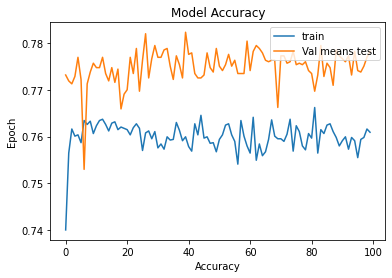

In [55]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(["train","Val means test"],loc='upper right')
plt.show()

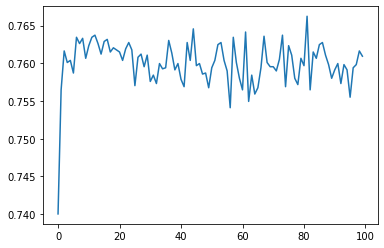

In [56]:
plt.plot(trained_model1.history['accuracy'])
plt.show()

In [58]:
Y_pred = model1.predict(X_test)
Y_pred = np.where(Y_pred>=0.5,1,0)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1585
           1       0.52      0.80      0.63       528

    accuracy                           0.77      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.77      0.78      2113

[[1195  390]
 [ 105  423]]


In [60]:
print('Train score')
model1.evaluate(X_train_ros, Y_train_ros)

Train score
225/225 [==============================] - 1s 6ms/step - loss: 0.5393 - accuracy: 0.7623


[0.5392946600914001, 0.7623293399810791]

In [61]:
print("Test score")
model1.evaluate(X_test_ros, Y_test_ros)

Test score
100/100 [==============================] - 1s 5ms/step - loss: 0.5207 - accuracy: 0.7782


[0.5206747055053711, 0.7782334089279175]